<a href="https://colab.research.google.com/github/ImmortalizedInHearts/NeuralNetwork/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.special import softmax

from tqdm import tqdm

In [54]:
mat = scipy.io.loadmat('data.mat')
trainInputs = np.array(mat['data']['test'][0][0][0][0][0])
trainTargets = np.array(mat['data']['test'][0][0][0][0][1])

testInputs = np.array(mat['data']['training'][0][0][0][0][0])
testTargets = np.array(mat['data']['training'][0][0][0][0][1])

validationInputs = np.array(mat['data']['validation'][0][0][0][0][1])
validationTargets = np.array(mat['data']['validation'][0][0][0][0][0])

In [79]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
  
def derivSigmoid(x):
  return x * (1 - x)

def crossEntropyLoss(y_true, y_pred, k):
  loss = y_true * np.log(y_pred)
  return -1 * np.sum(loss) / len(y_true.T)

def targetsSearch(data):
  predict = network.feedforward(data)[1].T
  return np.array([np.argmax(x) for x in predict])

In [89]:
class NeuralNetwork:
  def __init__(self, k):
    # weights
    self.k = k

    # bias
    self.b1 = 0
    self.b2 = 0

    # loss
    self.loss = list()
    
  def feedforward(self, data):
    h1 = sigmoid(self.k[0] @ data)
    h2 = softmax((self.k[1] @ h1))      #+bias
    return (h1, h2)

  def train(self, data, y_true):
        learn_rate = 0.00001
        epochs = 1000
 
        for epoch in tqdm(range(epochs)):
            """ backprop """

            forward = self.feedforward(data)

            # Neuron h1
            h1 = forward[0]
            
            # Neuron h2
            h2 = y_pred = forward[1] 

            dL_dh2 = h2 - y_true
            dL_dk2 = dL_dh2 @ h1.T 


            dh1_dk1 = h1 * (1 - h1)
            dL_dh1 =  dL_dh2.T @ self.k[1]
            dL_dk1 = (dL_dh1.T * dh1_dk1) @ data.T


            """ Weights and bias updating """
            # Neuron h1
            self.k[0] -= learn_rate * dL_dk1

            # Neuron h2
            self.k[1] -= learn_rate * dL_dk2

            """ Loss calculation """
            self.loss.append(crossEntropyLoss(y_true, y_pred, self.k))
            #learn_rate -= 0.0005/epochs 

In [90]:
kParameters = [np.zeros((128,256)), np.zeros((10,128))]
confMatrixTest = [[0 for x in range(10)] for i in range(10)]
confMatrixValidation = [[0 for x in range(10)] for i in range(10)]
confMatrixTrain = [[0 for x in range(10)] for i in range(10)]

network = NeuralNetwork(kParameters)
network.train(trainInputs, trainTargets)

100%|██████████| 1000/1000 [01:58<00:00,  8.43it/s]


In [91]:
testPredictions = [np.argmax(x) for x in network.feedforward(testInputs)[1].T]
validationPredictions = [np.argmax(x) for x in network.feedforward(validationInputs)[1].T]
trainPredictions = [np.argmax(x) for x in network.feedforward(trainInputs)[1].T]


for index in range(len(trainPredictions)):
  if index < 1000:
    confMatrixTest[np.argmax(testTargets.T[index])][testPredictions[index]] += 1
    confMatrixValidation[np.argmax(validationTargets.T[index])][validationPredictions[index]] += 1
  confMatrixTrain[np.argmax(trainTargets.T[index])][trainPredictions[index]] += 1

In [92]:
testPredictions
network.k[1]

array([[8.81924766, 8.81924766, 8.81924766, ..., 8.81924766, 8.81924766,
        8.81924766],
       [8.77815351, 8.77815351, 8.77815351, ..., 8.77815351, 8.77815351,
        8.77815351],
       [8.79310407, 8.79310407, 8.79310407, ..., 8.79310407, 8.79310407,
        8.79310407],
       ...,
       [8.7498982 , 8.7498982 , 8.7498982 , ..., 8.7498982 , 8.7498982 ,
        8.7498982 ],
       [8.81162313, 8.81162313, 8.81162313, ..., 8.81162313, 8.81162313,
        8.81162313],
       [8.79602961, 8.79602961, 8.79602961, ..., 8.79602961, 8.79602961,
        8.79602961]])

In [93]:
print(np.mean([confMatrixTest[i][i] for i in range(10)]))
confMatrixTest

10.0


[[100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [94]:
print(np.mean([confMatrixValidation[i][i] for i in range(10)]))
confMatrixValidation

10.0


[[100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [100, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [95]:
print(np.mean([confMatrixTrain[i][i] for i in range(10)]))
confMatrixTrain

90.0


[[900, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [900, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [900, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [900, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [900, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [900, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [900, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [900, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [900, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [900, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

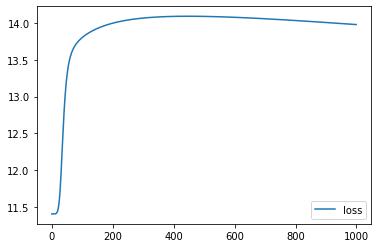

In [96]:
plt.plot(network.loss, label='loss')
plt.legend()

In [ ]:
(np.array([[3,6,6,1,1],[2,1,7,8,3]]).T @ np.array([[1,3,1],[0,2,1]])).T

array([[ 3,  6,  6,  1,  1],
       [13, 20, 32, 19,  9],
       [ 5,  7, 13,  9,  4]])